# Week 4 - Univariate Analysis, part 2

# 1. Lesson - None

# 2. Weekly graph question

Below are a histogram and boxplot representation of the same data. A pharmacy is keeping a record of the prices of the drugs that it sells, and an administrator wants to know how much the more expensive drugs tend to cost, in the context of the other prices.

Please write a short explanation of the pros and cons of these two representations. Which would you choose? How would you modify the formatting, if at all, to make it more visually interesting, clear, or informative?

In [4]:
import numpy as np
import pandas as pd

np.random.seed(0)
num_data = 100
data = np.exp(np.random.uniform(size = num_data) * 4)
df = pd.DataFrame(data.T, columns = ["data"])

The 75th percentile is: data    15.457656
Name: 0.75, dtype: float64


<Axes: ylabel='Frequency'>

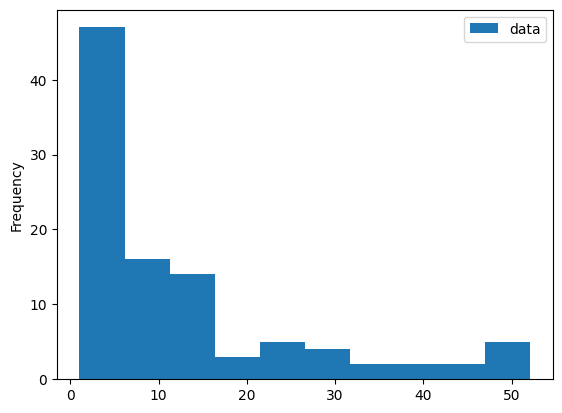

In [5]:
print("The 75th percentile is:", df.quantile(q = 0.75))
df.plot.hist()

<Axes: >

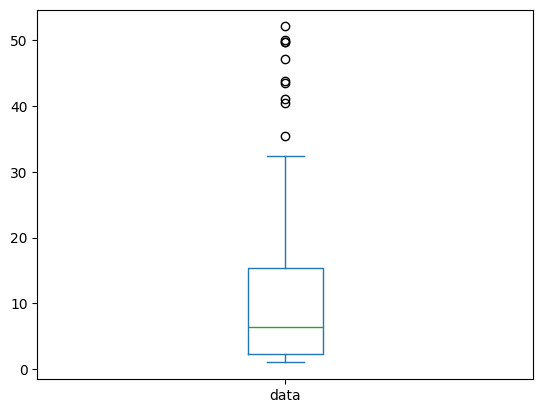

In [6]:
df.plot.box()

Histogram

Advantages 

1.Shows the distribution shape clearly — skewness, peaks, spread.

2.Helps see how common cheaper vs. expensive drugs are.

Disadvantages:

1. Doesn’t summarize statistics (like quartiles) directly.

2. Can be sensitive to bin width (can obscure patterns).

 Boxplot
Advantages:

1.Concise summary: median, quartiles, and outliers (high-cost drugs).

2. Effective for comparing multiple groups side-by-side (if expanded).

Disadvantages

1.Hides underlying distribution (you can’t see how skewed it is).

2. Outlier dots may not convey how many very expensive drugs there are.

# 3. Homework - working on your datasets

This week, you will do the same types of exercises as last week, but you should use your chosen datasets that someone in your class found last semester. (They likely will not be the particular datasets that you found yourself.)

### Here are some types of analysis you can do:

- Draw histograms and histogram variants for each feature or column.  (Swarm plot, kde plot, violin plot).

- Draw grouped histograms.  For instance, if you have tree heights for both maple and oak trees, you could draw histograms for both.

- Draw a bar plot to indicate total counts of each categorical variable in a given column.

- Find means, medians, and modes.

### Conclusions:

- Explain what conclusions you would draw from this analysis: are the data what you expect?  Are the data likely to be usable?  If they are not useable, find some new data!

- What is the overall shape of the distribution?  Is it normal, skewed, bimodal, uniform, etc.?

- Are there any outliers present?  (Data points that are far from the others.)

- If there are multiple related histograms, how does the distribution change across different groups?

- What are the minimum and maximum values represented in each histogram?

- How do bin sizes affect the histogram?  Does changing the bin width reveal different patterns in the data?

- Does the distribution appear normal, or does it have a different distribution?

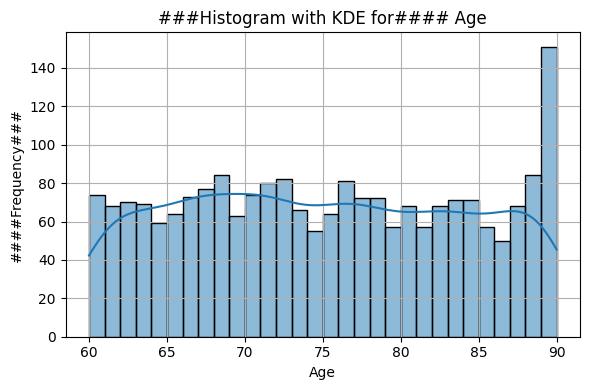

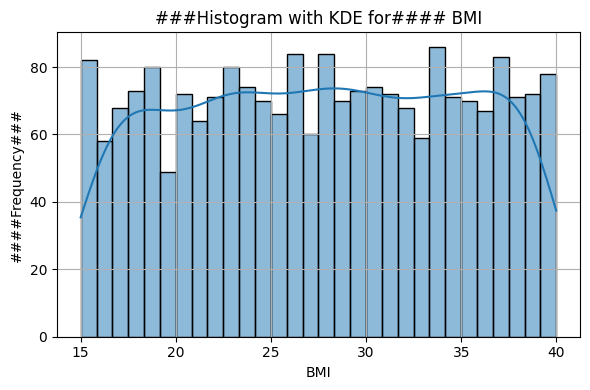

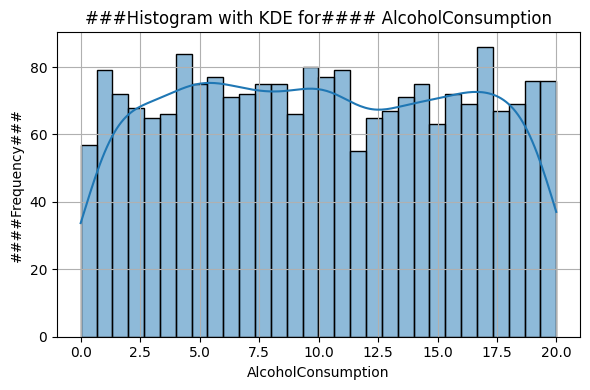

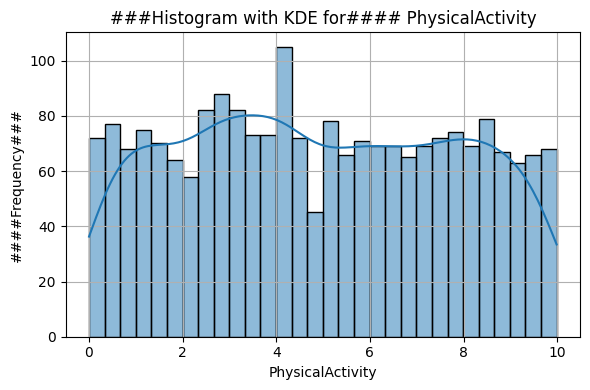

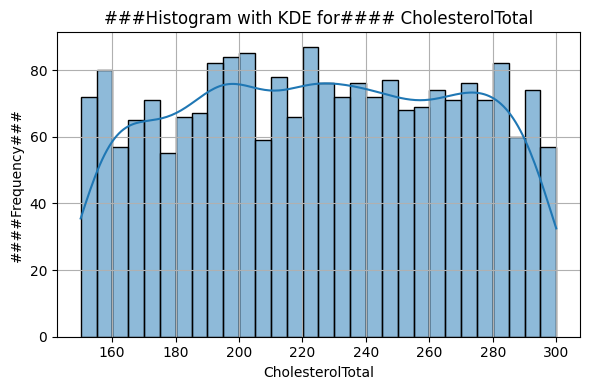

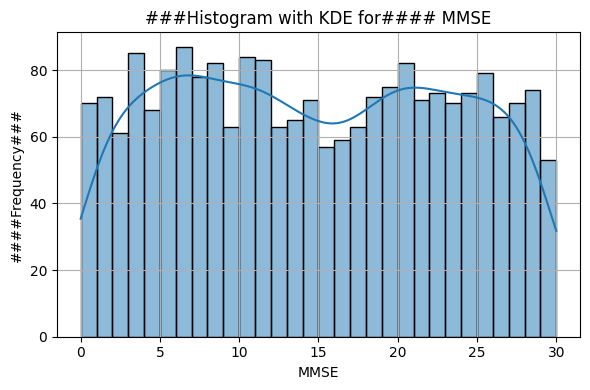

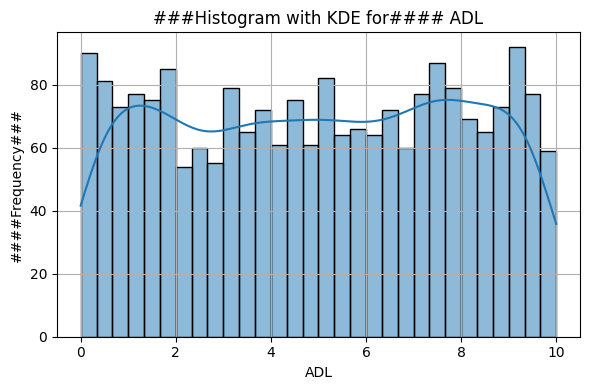

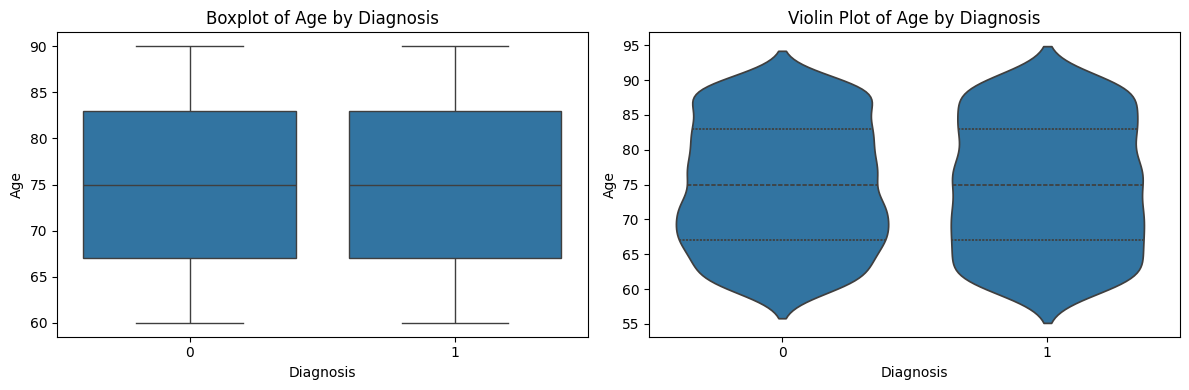

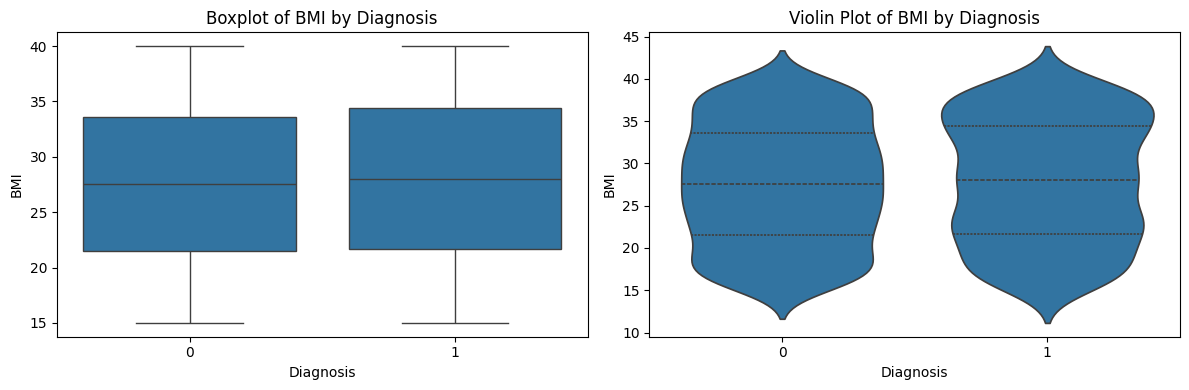

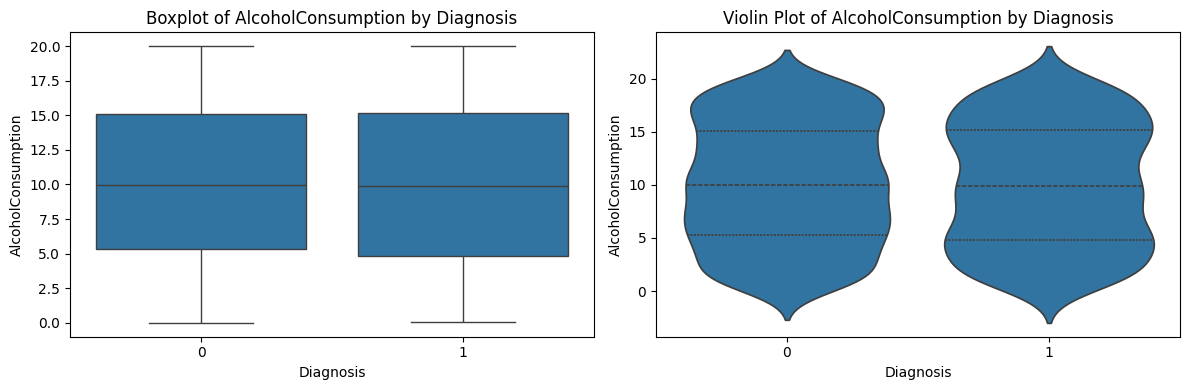

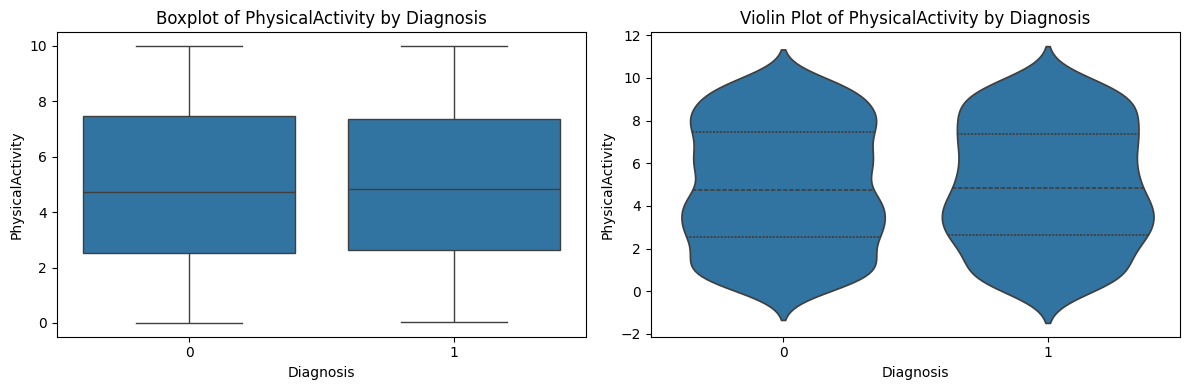

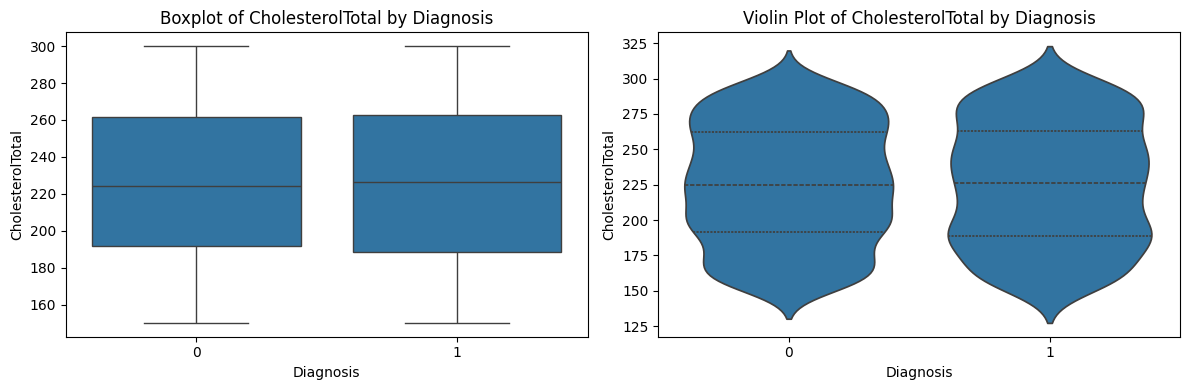

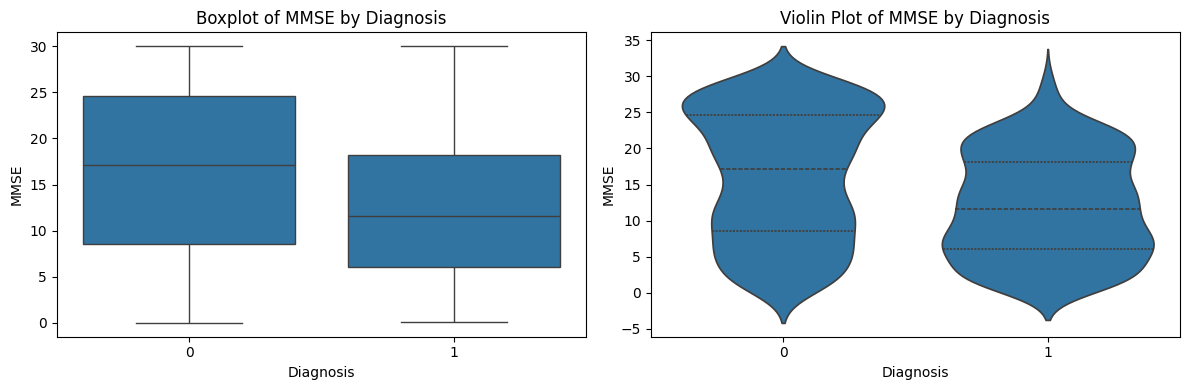

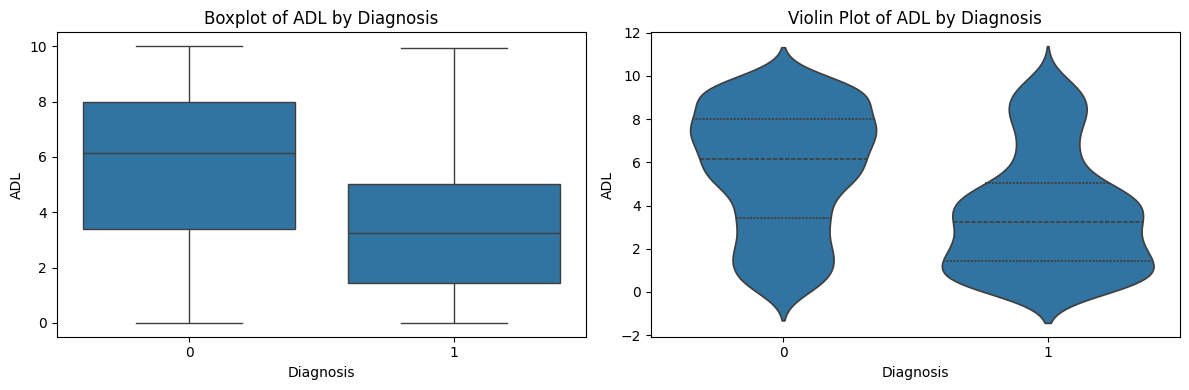

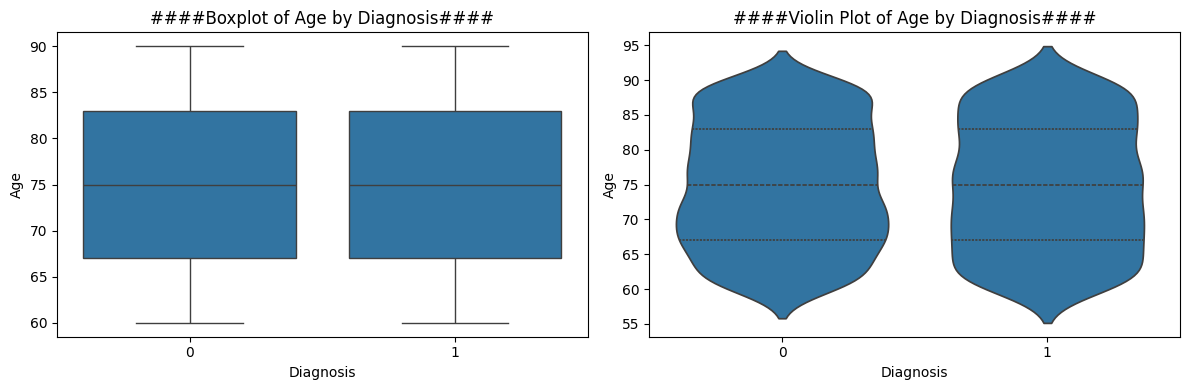

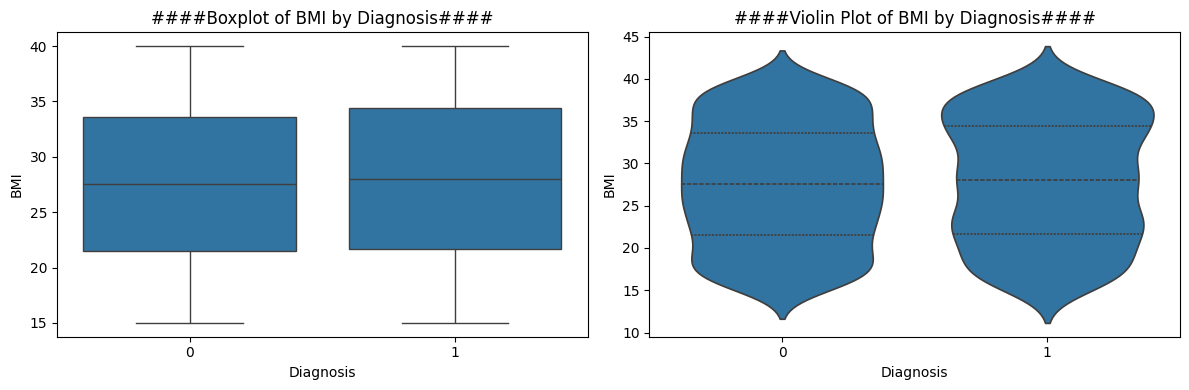

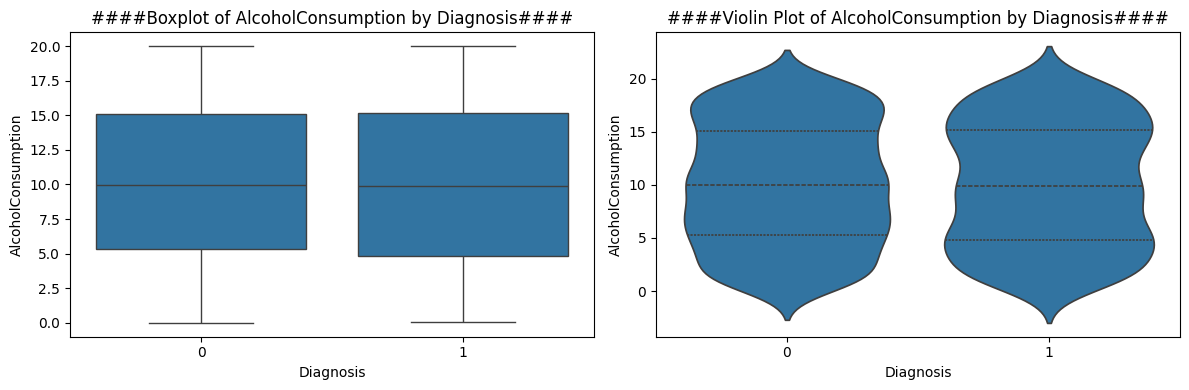

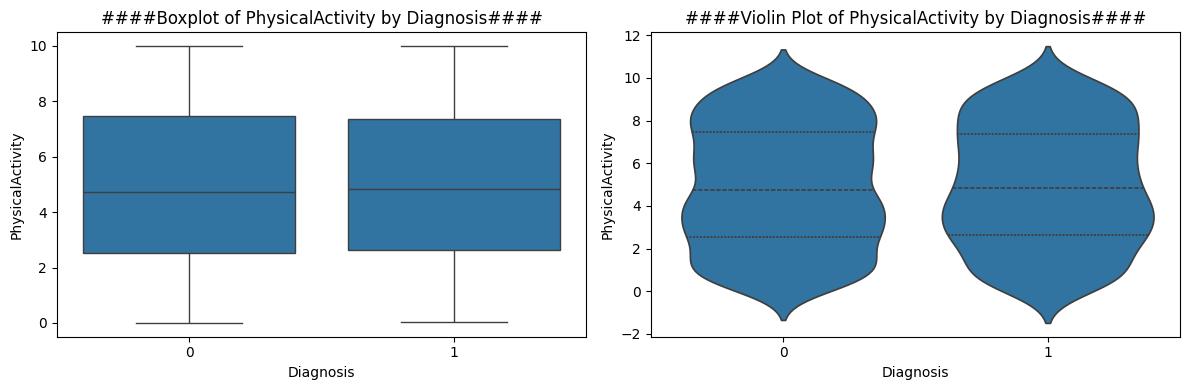

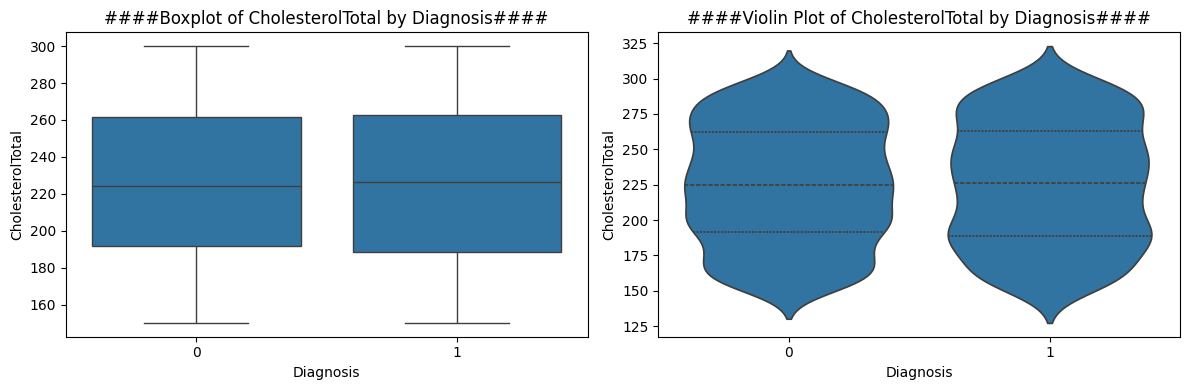

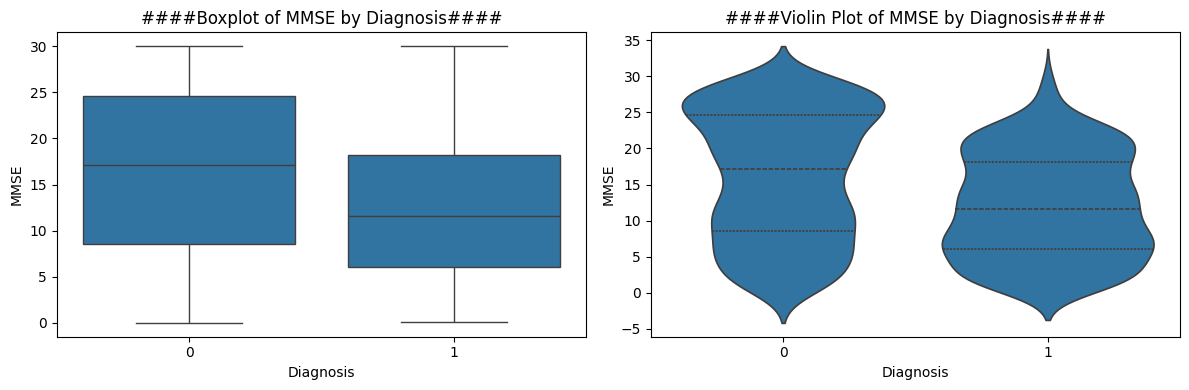

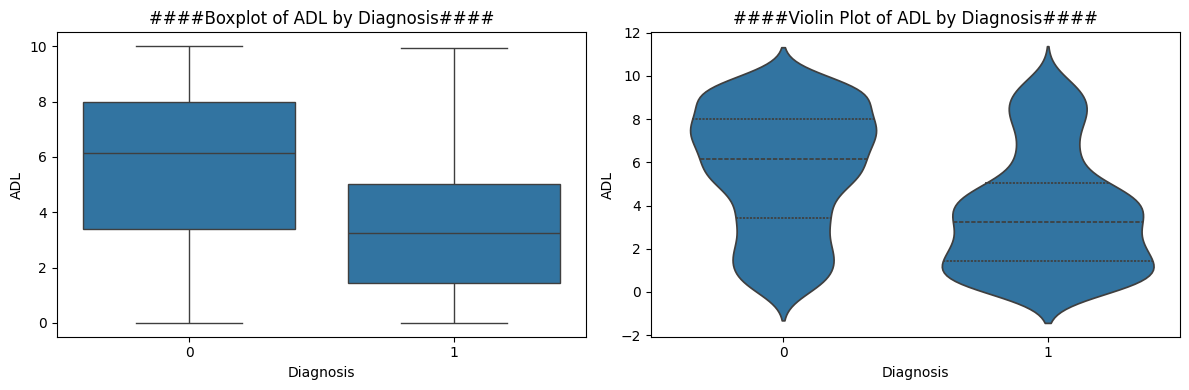

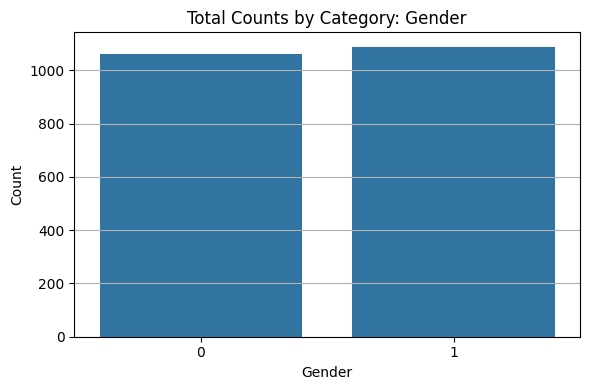

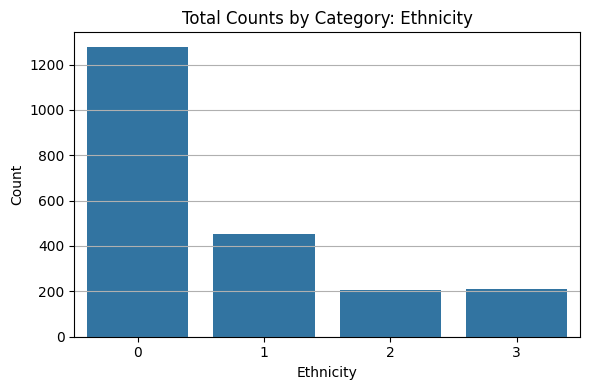

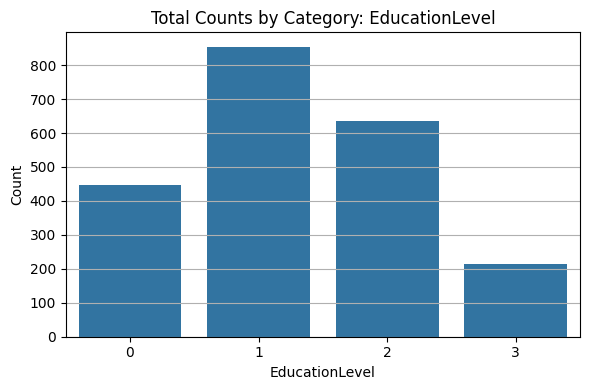

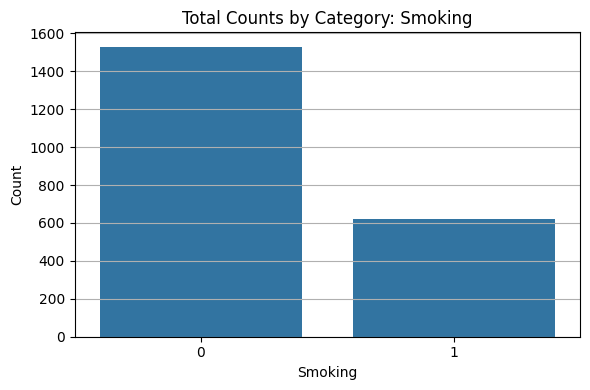

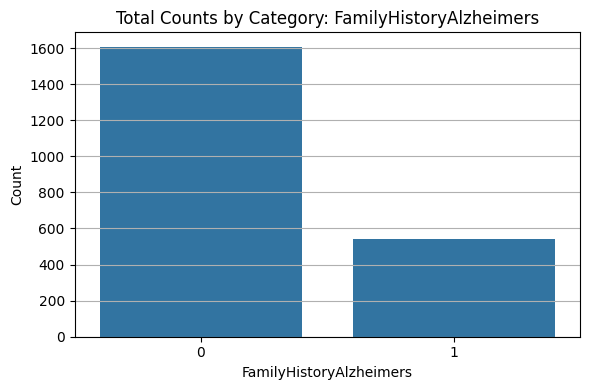

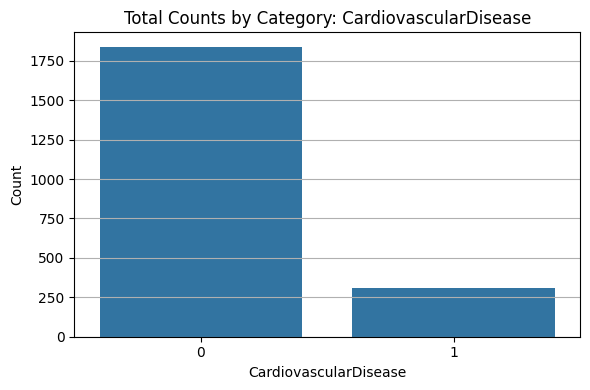

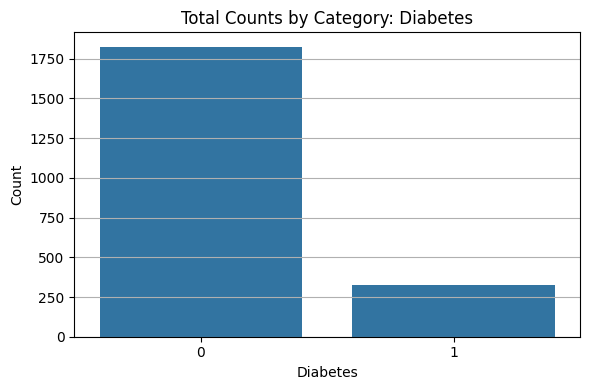

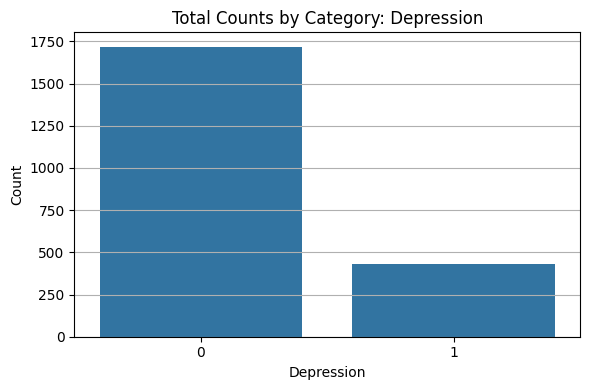

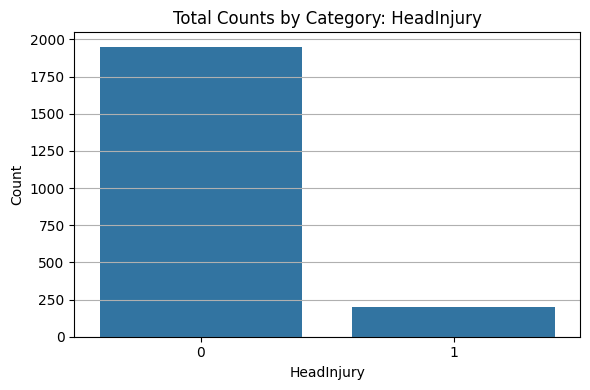

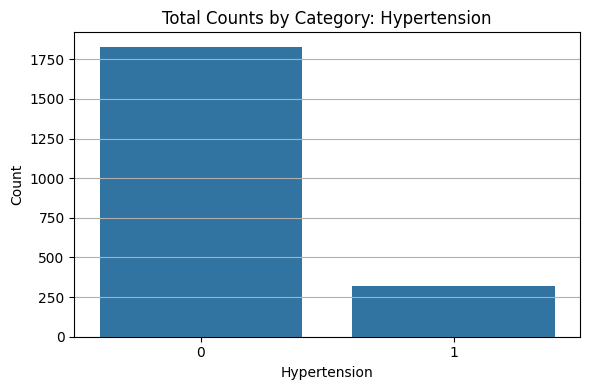

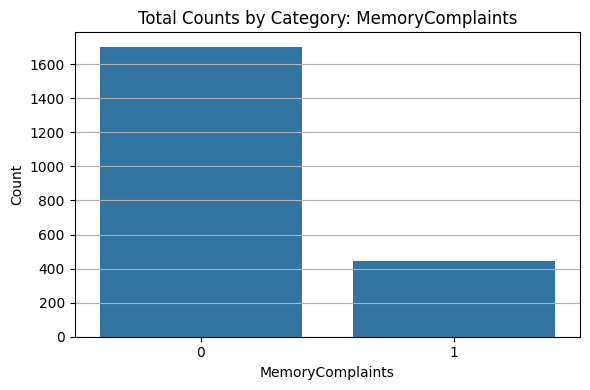

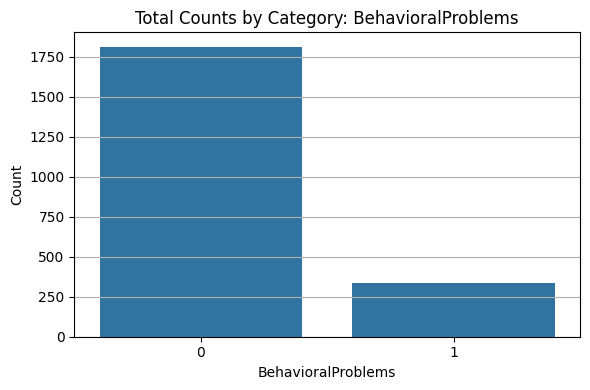

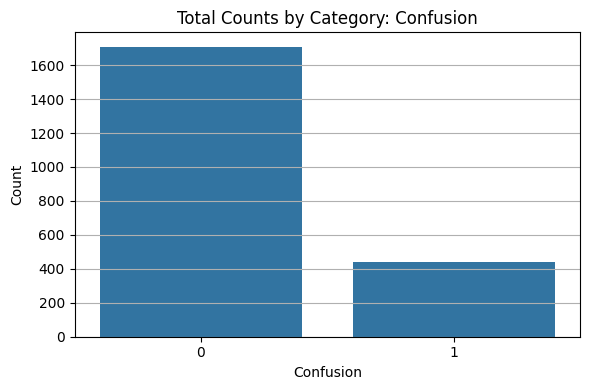

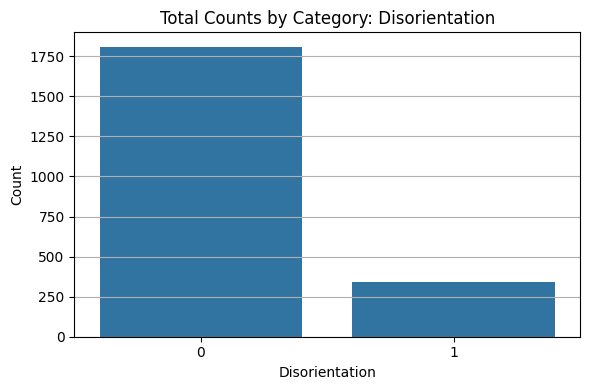

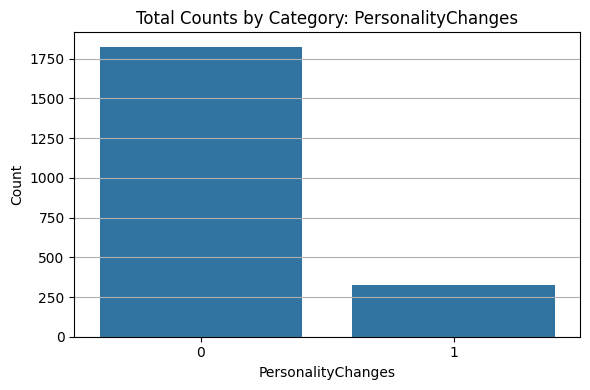

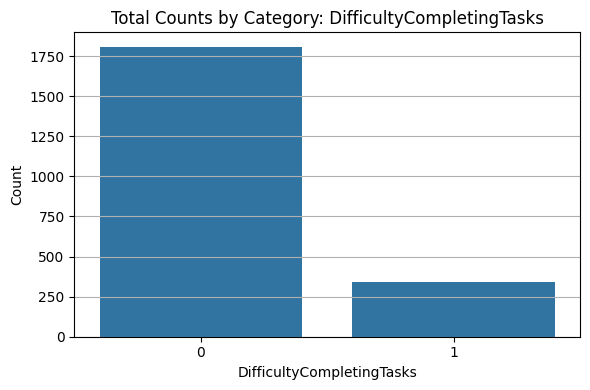

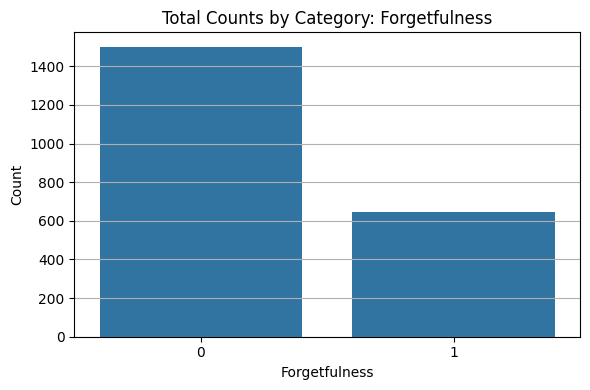

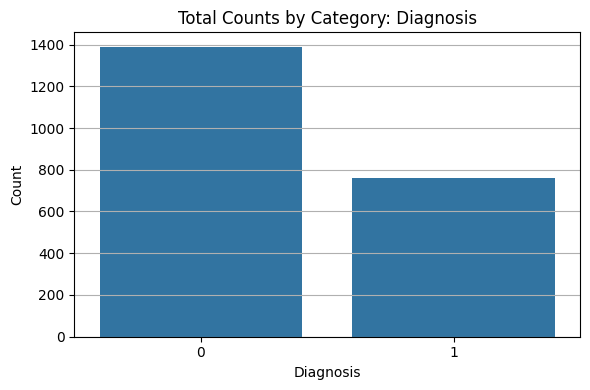

,Mean,Median,Mode
Age,74.908795,75.000000,68.000000
Gender,0.506282,1.000000,1.000000
Ethnicity,0.697534,0.000000,0.000000
EducationLevel,1.286645,1.000000,1.000000
BMI,27.655697,27.823924,15.008851
Smoking,0.288506,0.000000,0.000000
AlcoholConsumption,10.039442,9.934412,0.002003
PhysicalActivity,4.920202,4.766424,0.003616
DietQuality,4.993138,5.076087,0.009385
SleepQuality,7.051081,7.115646,4.002629


In [11]:
# I will be using Alzheimers disease data set which was used by my project counterpart in the last semester
# https://www.kaggle.com/datasets/rabieelkharoua/alzheimers-disease-dataset
# Re-import libraries after environment reset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Reload the dataset
df = pd.read_csv('alzheimers_disease_data.csv')

# Display basic info and sample rows
#df.info(), df.head()
# Let's pick a few key numeric features to explore visually
key_features = ['Age', 'BMI', 'AlcoholConsumption', 'PhysicalActivity', 'CholesterolTotal', 'MMSE', 'ADL']

# Create histograms for each selected feature
for feature in key_features:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[feature], kde=True, bins=30)
    plt.title(f"###Histogram with KDE for#### {feature}")
    plt.xlabel(feature)
    plt.ylabel("####Frequency###")
    plt.grid(True)
    plt.tight_layout()
    plt.show()


    # Draw boxplots and violin plots grouped by Diagnosis for the same selected features
for feature in key_features:
    plt.figure(figsize=(12, 4))

    # Boxplot
    plt.subplot(1, 2, 1)
    sns.boxplot(data=df, x='Diagnosis', y=feature)
    plt.title(f'Boxplot of {feature} by Diagnosis')
    plt.xlabel('Diagnosis')
    plt.ylabel(feature)

    # Violin plot
    plt.subplot(1, 2, 2)
    sns.violinplot(data=df, x='Diagnosis', y=feature, inner='quartile')
    plt.title(f'Violin Plot of {feature} by Diagnosis')
    plt.xlabel('Diagnosis')
    plt.ylabel(feature)

    plt.tight_layout()
    plt.show()

    

    # Draw boxplots and violin plots grouped by Diagnosis for the same selected features
for feature in key_features:
    plt.figure(figsize=(12, 4))

    # Boxplot
    plt.subplot(1, 2, 1)
    sns.boxplot(data=df, x='Diagnosis', y=feature)
    plt.title(f'####Boxplot of {feature} by Diagnosis####')
    plt.xlabel('Diagnosis')
    plt.ylabel(feature)

    # Violin plot
    plt.subplot(1, 2, 2)
    sns.violinplot(data=df, x='Diagnosis', y=feature, inner='quartile')
    plt.title(f'####Violin Plot of {feature} by Diagnosis####')
    plt.xlabel('Diagnosis')
    plt.ylabel(feature)

    plt.tight_layout()
    plt.show()


    # Identify categorical variables (by integer type and small number of unique values)
categorical_cols = [col for col in df.columns 
                    if df[col].dtype in ['int64', 'int32'] and df[col].nunique() <= 10 and col != 'PatientID']

# Plot bar charts for each categorical column
import matplotlib.pyplot as plt
import seaborn as sns

for col in categorical_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df, x=col)
    plt.title(f"Total Counts by Category: {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.grid(True, axis='y')
    plt.tight_layout()
    plt.show()



# Compute means, medians, and modes for numerical features only
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns.drop('PatientID')

means = df[numerical_cols].mean()
medians = df[numerical_cols].median()
modes = df[numerical_cols].mode().iloc[0]  # mode() returns a DataFrame, take the first row

# Combine into a single DataFrame
summary_stats = pd.DataFrame({
    'Mean': means,
    'Median': medians,
    'Mode': modes
})


summary_stats.head(10)




Conclusions from the Analysis
Are the data what you expect? Are they usable?
Yes, the data appears consistent with what we'd expect in a medical dataset involving Alzheimer's Disease. It includes a mix of demographic, lifestyle, health, and symptom-based variables. The data is complete, with no missing values in the sampled view, and is rich enough for exploratory and predictive modeling.

What is the overall shape of the distribution?
Most features show non-normal distributions:

Right-skewed: Alcohol consumption, BMI, Age, ADL

Left-skewed: MMSE (cognitive test scores)

Approximately normal: Physical activity, Sleep quality

Some features show strong skewness or sparsity in values (e.g., binary symptom flags, Diagnosis)

Are there any outliers?
Yes. Outliers are clearly visible in:

BMI (values above 40)

AlcoholConsumption (extremely high outliers)

ADL and MMSE (some individuals have significantly low scores)
Boxplots helped clearly identify these.

Do distributions change across groups (e.g., Diagnosis)?
Yes:

MMSE and ADL scores are much lower in individuals diagnosed with Alzheimer’s.

Physical activity is generally lower in the diagnosed group.

Some features (like cholesterol) show minimal group separation, suggesting less predictive value.

Minimum and maximum values in histograms?

Age: ~65 to ~95

BMI: ~15 to ~50

Alcohol Consumption: 0 to ~40

MMSE: ~0 to 30 (30 is max score)

ADL: ~0 to 10 (scale for daily living activities)

How do bin sizes affect histograms?
Smaller bin sizes reveal fine-grained patterns (e.g., clusters or peaks in Age and MMSE), while larger bins smooth them out but may mask outliers. For skewed features, narrower bins help reveal data concentration vs. tail behavior.

Does the distribution appear normal?
Only a few features (like SleepQuality or PhysicalActivity) approximate normality. Most are skewed, multimodal, or bounded (e.g., MMSE scores capped at 30).


Summary
The data is usable and rich, especially for modeling Alzheimer’s progression and diagnosis.

Skewed distributions and outliers must be handled (e.g., using log transforms or robust scaling).

MMSE, ADL, PhysicalActivity, Age are strong differentiators between diagnosis groups.

Proper preprocessing and feature selection will be critical for effective machine learning on this dataset.



# 4. Storytelling With Data graph

Reproduce any graph of your choice in p. 52-68 of the Storytelling With Data book as best you can.  (The second half of chapter two).  You do not have to get the exact data values right, just the overall look and feel.

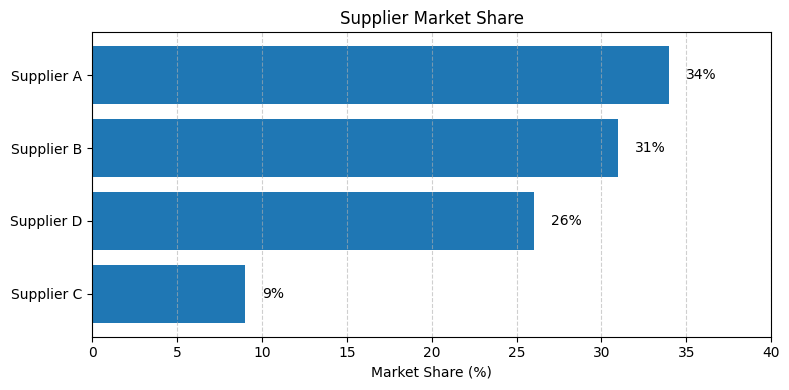

In [13]:
# Reproduce the horizontal bar chart alternative to the pie chart from Figure 2.23 in the book

# Supplier data (sorted from largest to smallest)
suppliers = ['Supplier A', 'Supplier B', 'Supplier D', 'Supplier C']
market_share = [34, 31, 26, 9]

# Create horizontal bar chart
plt.figure(figsize=(8, 4))
bars = plt.barh(suppliers, market_share, color='#1f77b4')

# Annotate each bar with percentage
for bar in bars:
    plt.text(bar.get_width() + 1, bar.get_y() + bar.get_height()/2,
             f'{bar.get_width()}%', va='center')

plt.title('Supplier Market Share')
plt.xlabel('Market Share (%)')
plt.xlim(0, 40)
plt.gca().invert_yaxis()  # Largest at the top
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()